## 必备函数

In [29]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque, Counter
import time

## 全局耦合网络、最近邻耦合网络、星形网络、随机网络 networkx实现

In [30]:
def global_network(num_nodes: int):
    g = nx.Graph()
    g.add_edges_from(np.vstack(np.triu_indices(num_nodes, k=1)).T)
    return g

def nearest_neighbor_network(num_nodes: int, k: int):
    assert k % 2 == 0, "K must be an even number"

    g = nx.Graph()
    for offset in range(1, k // 2 + 1):
        g.add_edges_from(
            np.hstack(
                [
                    np.vstack(
                        [np.arange(num_nodes), np.roll(np.arange(num_nodes), -offset)]
                    ),
                    np.vstack(
                        [np.arange(num_nodes), np.roll(np.arange(num_nodes), offset)]
                    ),
                ],
            ).T
        )

    return g

def star_network(num_nodes: int):
    g = nx.Graph()
    g.add_edges_from(
        np.vstack([np.repeat(0, num_nodes - 1), np.arange(1, num_nodes)]).T
    )
    return g

def random_network(num_nodes: int, p: float):
    assert 0 <= p <= 1, "Probability p must be between 0 and 1."

    g = nx.Graph()
    upper_tri = np.triu(np.random.rand(num_nodes, num_nodes), 1)
    upper_tri[upper_tri < p] = 1
    upper_tri[upper_tri != 1] = 0
    g.add_edges_from(np.column_stack(np.where((upper_tri + upper_tri.T) == 1)))

    return g

## 全局耦合网络、最近邻耦合网络、星形网络、随机网络 python邻接矩阵实现

In [31]:
def global_network_py(num_nodes: int):
    g = {i: set() for i in range(num_nodes)}
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            g[i].add(j)
            g[j].add(i)
    return g

def nearest_neighbor_network_py(num_nodes: int, k: int):
    assert k % 2 == 0, "K must be an even number"
    
    g = {i: set() for i in range(num_nodes)}
    for i in range(num_nodes):
        for offset in range(1, k // 2 + 1):
            g[i].add((i - offset) % num_nodes)
            g[i].add((i + offset) % num_nodes)
            g[(i - offset) % num_nodes].add(i)
            g[(i + offset) % num_nodes].add(i)
    return g

def nearest_neighbor_network_py(num_nodes: int, k: int):
    assert k % 2 == 0, "K must be an even number"
    
    g = {i: set() for i in range(num_nodes)}
    for i in range(num_nodes):
        for offset in range(1, k // 2 + 1):
            g[i].add((i - offset) % num_nodes)
            g[i].add((i + offset) % num_nodes)
            g[(i - offset) % num_nodes].add(i)
            g[(i + offset) % num_nodes].add(i)
    return g

def random_network_py(num_nodes: int, p: float):
    assert 0 <= p <= 1, "Probability p must be between 0 and 1."
    
    g = {i: set() for i in range(num_nodes)}
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if random.random() < p:
                g[i].add(j)
                g[j].add(i)
    return g


## 平均路径长度networkx实现

In [32]:
def average_shortest_path_length_nx(g):
    return nx.average_shortest_path_length(g)

## 平均路径长度bfs实现

In [33]:
def bfs_shortest_path_length(g, start):
    visited = {start: 0}
    queue = deque([start])

    while queue:
        node = queue.popleft()
        current_distance = visited[node]

        for neighbor in g.neighbors(node):
            if neighbor not in visited:
                visited[neighbor] = current_distance + 1
                queue.append(neighbor)

    return visited

def average_shortest_path_length_bfs(g):
    n = len(g)
    total_path_length = 0
    for node in g:
        shortest_path_lengths = bfs_shortest_path_length(g, node)
        total_path_length += sum(shortest_path_lengths.values())

    return total_path_length / (n * (n - 1))

## 平均路径长度dij实现

In [34]:
import heapq

def dijkstra_shortest_path_length(g, start):
    distances = {node: float('inf') for node in g}
    distances[start] = 0
    pq = [(0, start)]
    
    while pq:
        current_distance, node = heapq.heappop(pq)
        
        if current_distance > distances[node]:
            continue
        
        for neighbor in g.neighbors(node):
            distance = current_distance + 1  # Edge weight is 1 in an unweighted graph
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))
    
    return distances

def average_shortest_path_length_dijkstra(g):
    n = len(g)
    total_path_length = 0
    for node in g:
        shortest_path_lengths = dijkstra_shortest_path_length(g, node)
        total_path_length += sum(shortest_path_lengths.values())

    return total_path_length / (n * (n - 1))


## 平均路径长度A*实现

In [35]:
def a_star_shortest_path_length(g, start):
    distances = {node: float('inf') for node in g}
    distances[start] = 0
    pq = [(0, start)]
    
    while pq:
        current_distance, node = heapq.heappop(pq)
        
        if current_distance > distances[node]:
            continue
        
        for neighbor in g.neighbors(node):
            distance = current_distance + 1  # Edge weight is 1 in an unweighted graph
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))
    
    return distances

def average_shortest_path_length_astar(g):
    n = len(g)
    total_path_length = 0
    for node in g:
        shortest_path_lengths = a_star_shortest_path_length(g, node)
        total_path_length += sum(shortest_path_lengths.values())

    return total_path_length / (n * (n - 1))


## 平均路径长度实现对比

In [39]:
def compare_algorithms(g):
    start_time = time.time()
    bfs_result = average_shortest_path_length_bfs(g)
    bfs_time = time.time() - start_time
    
    start_time = time.time()
    dijkstra_result = average_shortest_path_length_dijkstra(g)
    dijkstra_time = time.time() - start_time
    
    start_time = time.time()
    astar_result = average_shortest_path_length_astar(g)
    astar_time = time.time() - start_time
    
    start_time = time.time()
    nx_result = average_shortest_path_length_nx(g)
    nx_time = time.time() - start_time
    
    print(f"BFS: {bfs_result} in {bfs_time:.6f} seconds")
    print(f"Dijkstra: {dijkstra_result} in {dijkstra_time:.6f} seconds")
    print(f"A*: {astar_result} in {astar_time:.6f} seconds")
    print(f"NetworkX: {nx_result} in {nx_time:.6f} seconds")


In [47]:
num_nodes = 100

# 创建不同类型的图
g_global = global_network(num_nodes)
g_nearest = nearest_neighbor_network(num_nodes, 4)
g_star = star_network(num_nodes)
g_random = random_network(num_nodes, 0.1)

# 比较算法
print("Global Network:")
compare_algorithms(g_global)

print("\nNearest Neighbor Network:")
compare_algorithms(g_nearest)

print("\nStar Network:")
compare_algorithms(g_star)

print("\nRandom Network:")
compare_algorithms(g_random)


Global Network:
BFS: 1.0 in 0.061929 seconds
Dijkstra: 1.0 in 0.115193 seconds
A*: 1.0 in 0.127889 seconds
NetworkX: 1.0 in 0.004993 seconds

Nearest Neighbor Network:
BFS: 12.878787878787879 in 0.008876 seconds
Dijkstra: 12.878787878787879 in 0.015979 seconds
A*: 12.878787878787879 in 0.015469 seconds
NetworkX: 12.878787878787879 in 0.007503 seconds

Star Network:
BFS: 1.98 in 0.006488 seconds
Dijkstra: 1.98 in 0.012982 seconds
A*: 1.98 in 0.013492 seconds
NetworkX: 1.98 in 0.004014 seconds

Random Network:
BFS: 1.1020202020202021 in 0.054049 seconds
Dijkstra: 1.1020202020202021 in 0.116733 seconds
A*: 1.1020202020202021 in 0.107167 seconds
NetworkX: 1.1020202020202021 in 0.005335 seconds


## 聚类系数计算对比

In [55]:
def average_clustering(g):
    def triangle_degree_iter(): 
        for u, u_nbrs in g.adj.items():
            u_nbrs = set(u_nbrs) - {u}  # remove self-loop if exists
            gen_degree = Counter(len(u_nbrs & (set(g[v]) - {v})) for v in u_nbrs)
            num_triangles = sum(k * val for k, val in gen_degree.items())
            yield (len(u_nbrs), num_triangles)

    return sum(
        0 if T == 0 else T / (deg * (deg - 1)) for deg, T in triangle_degree_iter()
    ) / len(g)

def average_clustering_nx(g):
    return nx.average_clustering(g)


In [58]:
def compare_algorithms(g):
    # 比较平均聚类系数
    start_time = time.time()
    custom_clustering = average_clustering(g)
    custom_clustering_time = time.time() - start_time
    
    start_time = time.time()
    nx_clustering = average_clustering_nx(g)
    nx_clustering_time = time.time() - start_time
    
    print(f"Custom Clustering: {custom_clustering} in {custom_clustering_time:.6f} seconds")
    print(f"NetworkX Clustering: {nx_clustering} in {nx_clustering_time:.6f} seconds")


In [59]:
num_nodes = 100

# 创建不同类型的图
g_global = global_network(num_nodes)
g_nearest = nearest_neighbor_network(num_nodes, 4)
g_star = star_network(num_nodes)
g_random = random_network(num_nodes, 0.1)

# 比较算法
print("Global Network:")
compare_algorithms(g_global)

print("\nNearest Neighbor Network:")
compare_algorithms(g_nearest)

print("\nStar Network:")
compare_algorithms(g_star)

print("\nRandom Network:")
compare_algorithms(g_random)


Global Network:
Custom Clustering: 1.0 in 0.090193 seconds
NetworkX Clustering: 1.0 in 0.085666 seconds

Nearest Neighbor Network:
Custom Clustering: 0.5 in 0.000998 seconds
NetworkX Clustering: 0.5 in 0.000997 seconds

Star Network:
Custom Clustering: 0.0 in 0.001000 seconds
NetworkX Clustering: 0.0 in 0.000995 seconds

Random Network:
Custom Clustering: 0.9038406139449154 in 0.091088 seconds
NetworkX Clustering: 0.9038406139449154 in 0.081802 seconds


## 可视化展示

In [49]:
num_nodes = 10
k = 4 # for nearest neighbor coupled network
p = 0.5 # for random network

def show_graph(g):
    nx.draw(g, pos = nx.circular_layout(g))
    plt.show()
    # verify the correctness of our implementation
    assert average_shortest_path_length(g) == nx.average_shortest_path_length(g)
    assert average_clustering(g) == nx.average_clustering(g)

    print(f"Average shortest path length: {average_shortest_path_length(g)}")
    print(f"Average clustering coefficient: {average_clustering(g)}")

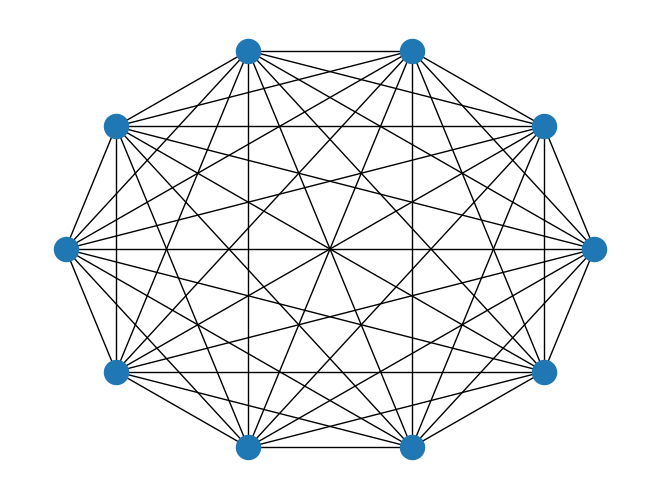

Average shortest path length: 1.0
Average clustering coefficient: 1.0


In [50]:
show_graph(global_network(num_nodes))

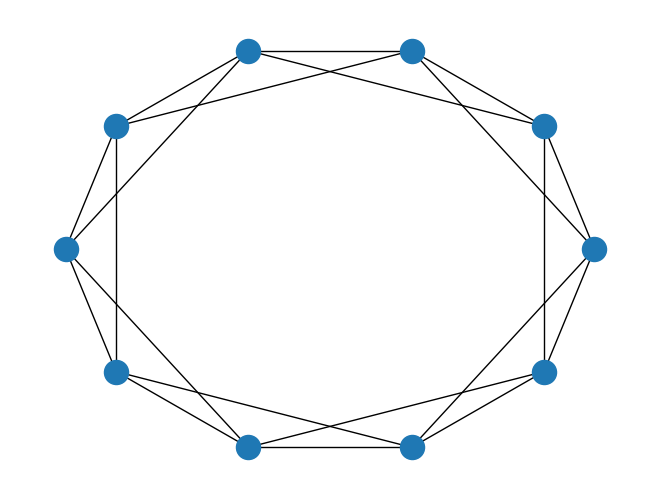

Average shortest path length: 1.6666666666666667
Average clustering coefficient: 0.5


In [51]:
show_graph(nearest_neighbor_network(num_nodes, k))

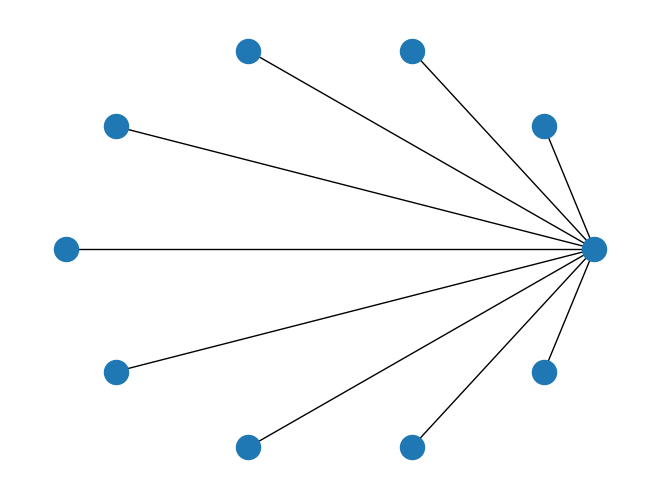

Average shortest path length: 1.8
Average clustering coefficient: 0.0


In [52]:
show_graph(star_network(num_nodes))

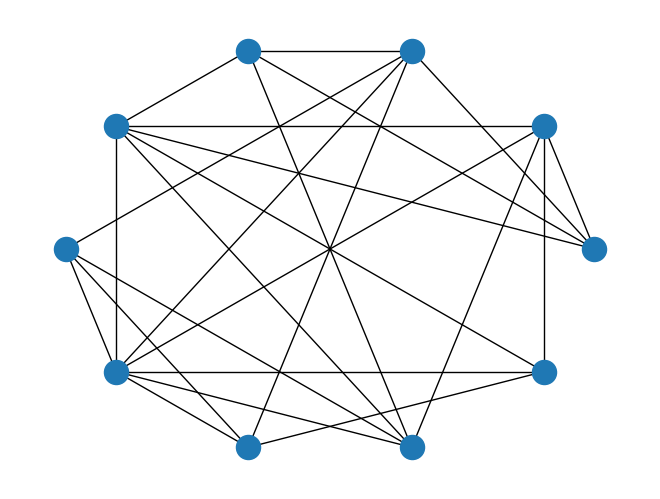

Average shortest path length: 1.4666666666666666
Average clustering coefficient: 0.550952380952381


In [53]:
show_graph(random_network(num_nodes, p))